# 📘 Result Analysis & Visualization

## 1. Load Outputs

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import display, HTML

# Cấu hình hiển thị
pd.set_option('display.max_colwidth', None)
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Đọc dữ liệu (Thay đổi đường dẫn file nếu cần)
df_baseline = pd.read_csv('../output/deepseek_ocr_baseline_results.csv')
df_finetune = pd.read_csv('../output/evaluation_results.csv')

# Đổi tên cột để phân biệt khi gộp
df_baseline = df_baseline.rename(columns={'prediction': 'pred_baseline', 'cer': 'cer_baseline'})
df_finetune = df_finetune.rename(columns={'prediction': 'pred_finetune', 'cer': 'cer_finetune'})

# Gộp 2 dataframe dựa trên tên ảnh và ground truth
# Giả sử cột 'image' là định danh duy nhất
df_merged = pd.merge(
    df_baseline[['image', 'ground_truth', 'pred_baseline', 'cer_baseline']],
    df_finetune[['image', 'pred_finetune', 'cer_finetune']],
    on='image',
    how='inner'
)

# Tính mức độ cải thiện (CER giảm là tốt -> improvement dương)
df_merged['cer_improvement'] = df_merged['cer_baseline'] - df_merged['cer_finetune']

print(f"Số lượng mẫu đánh giá: {len(df_merged)}")
df_merged.head(5)

Số lượng mẫu đánh giá: 201


,image,ground_truth,pred_baseline,cer_baseline,pred_finetune,cer_finetune,cer_improvement
0,/kaggle/input/uit-hwdb/UIT_HWDB_line/UIT_HWDB_line/test_data/253/1.jpg,"Viết tiếp về vụ anh Trương Xuân Đại. Ngay từ khi tờ báo có bài "" Số phận của","Vui tôi tiếp vẫn muốn tham gia Xuân Đại. Ngày tôi thôi tự bảo ""cô phẩm của""",0.486842,"Việc tiếp về vụ anh Trương Xuân Đại. Ngày từ khi tổ báo "" cơ sở phân của",0.171053,0.315789
1,/kaggle/input/uit-hwdb/UIT_HWDB_line/UIT_HWDB_line/test_data/253/2.jpg,"những người nói lên sự thật "" phát hành, nhiều bạn đọc đã bày tỏ sự chia sẻ,","making no doubt lei is that that's what's in, there's been a lot of big to us this set.",0.723684,"những người nói lên sự thật "" phát hành, nhân lâm đặc sắc bằng tố cáo của sự",0.276316,0.447368
2,/kaggle/input/uit-hwdb/UIT_HWDB_line/UIT_HWDB_line/test_data/253/3.jpg,ủng hộ anh Trương Xuân Đại. Một bạn đọc 67 tuổi ở Q.11 đến gửi tặng anh Trương,ng họ anh Trường Xuân Đại. Mặt bàn đác 6 tầng là 8 Q. Miền gửi tặng anh Trường,0.256410,ứng hộ anh Trương Xuân Đại. Mặt bọn đạc 67 tuổi ở Q. 11 đến gửi tặng anh Trương,0.064103,0.192308
3,/kaggle/input/uit-hwdb/UIT_HWDB_line/UIT_HWDB_line/test_data/253/4.jpg,"Xuân Đại 150.000 đồng, một cô gái tên Nhung ở Tân Bình gửi tặng 100.000 đ,","yīcuān Dùn 150.000 zhāng, mǎi cǎo gēn lǐn Nìngyù? Tūn Bǐnzhū gōng fēng 100.000,",0.459459,"Xuân Đại 150.000 đồng, một cô gái tên Nhung ở Tân Bình qui tụng 100.000,",0.067568,0.391892
4,/kaggle/input/uit-hwdb/UIT_HWDB_line/UIT_HWDB_line/test_data/253/5.jpg,một thanh niên tên Hà đến gửi 200.000 đ. Sau đó nữa là rất,mẹ thành mẹ nữ Hai đến quý 200.000. Sand và mẹ là mẹ!,0.465517,"mặt thanh niên tên Hà đến quý 200.000. Sau đó mùa là này,",0.206897,0.258621


## 2. Quantitative Analysis

In [2]:
# Tính toán các chỉ số trung bình
avg_cer_baseline = df_merged['cer_baseline'].mean()
avg_cer_finetune = df_merged['cer_finetune'].mean()
cer_reduction = avg_cer_baseline - avg_cer_finetune
percent_improvement = (cer_reduction / avg_cer_baseline) * 100

# Tạo DataFrame tổng hợp
summary_df = pd.DataFrame({
    'Metric': ['Average CER', 'Median CER', 'Max CER', 'Std Dev'],
    'Baseline Model': [
        df_merged['cer_baseline'].mean(),
        df_merged['cer_baseline'].median(),
        df_merged['cer_baseline'].max(),
        df_merged['cer_baseline'].std()
    ],
    'Fine-tuned Model': [
        df_merged['cer_finetune'].mean(),
        df_merged['cer_finetune'].median(),
        df_merged['cer_finetune'].max(),
        df_merged['cer_finetune'].std()
    ]
})

# Format hiển thị
print(f"=== KẾT QUẢ TỔNG HỢP ===")
print(f"Baseline Average CER: {avg_cer_baseline:.4f}")
print(f"Fine-tuned Average CER: {avg_cer_finetune:.4f}")
print(f"Mức độ cải thiện (Absolute Reduction): {cer_reduction:.4f}")
print(f"Tỷ lệ cải thiện (Relative Improvement): {percent_improvement:.2f}%")
display(summary_df)

=== KẾT QUẢ TỔNG HỢP ===
Baseline Average CER: 1.0569
Fine-tuned Average CER: 0.1157
Mức độ cải thiện (Absolute Reduction): 0.9411
Tỷ lệ cải thiện (Relative Improvement): 89.05%


,Metric,Baseline Model,Fine-tuned Model
0,Average CER,1.056886,0.115737
1,Median CER,0.318182,0.058824
2,Max CER,130.948052,0.584615
3,Std Dev,9.211238,0.141732


### 3. Visual Analysis

Để đồ thị dễ quan sát hơn, thực hiện việc lọc các outlier có giá trị CER quá cao.

In [3]:
# --- BƯỚC 1: XỬ LÝ & THỐNG KÊ OUTLIER ---
# Định nghĩa ngưỡng Outlier (Thường CER > 1.0 hoặc 1.5 là rất tệ)
outlier_threshold = 1.5

# Đếm số lượng outlier
outliers_base = df_merged[df_merged['cer_baseline'] > outlier_threshold]
outliers_ft = df_merged[df_merged['cer_finetune'] > outlier_threshold]

print(f"=== LỌC OUTLIER (CER > {outlier_threshold}) ===")
print(f"Số mẫu Baseline bị outlier: {len(outliers_base)} trên tổng số {len(df_merged)} ({len(outliers_base)/len(df_merged):.2%})")
print(f"Số mẫu Fine-tuned bị outlier: {len(outliers_ft)} trên tổng số {len(df_merged)} ({len(outliers_ft)/len(df_merged):.2%})")

# Tạo dataframe clean chỉ dùng để vẽ biểu đồ (loại bỏ các outlier để biểu đồ đẹp hơn)
# Lưu ý: Khi tính toán số liệu trung bình ở Cell 2 vẫn nên dùng df gốc để trung thực, không loại outlier
df_plot = df_merged[
    (df_merged['cer_baseline'] <= outlier_threshold) &
    (df_merged['cer_finetune'] <= outlier_threshold)
].copy()

=== LỌC OUTLIER (CER > 1.5) ===
Số mẫu Baseline bị outlier: 1 trên tổng số 201 (0.50%)
Số mẫu Fine-tuned bị outlier: 0 trên tổng số 201 (0.00%)



Đang vẽ biểu đồ trên 200 mẫu dữ liệu (đã lọc outlier)...


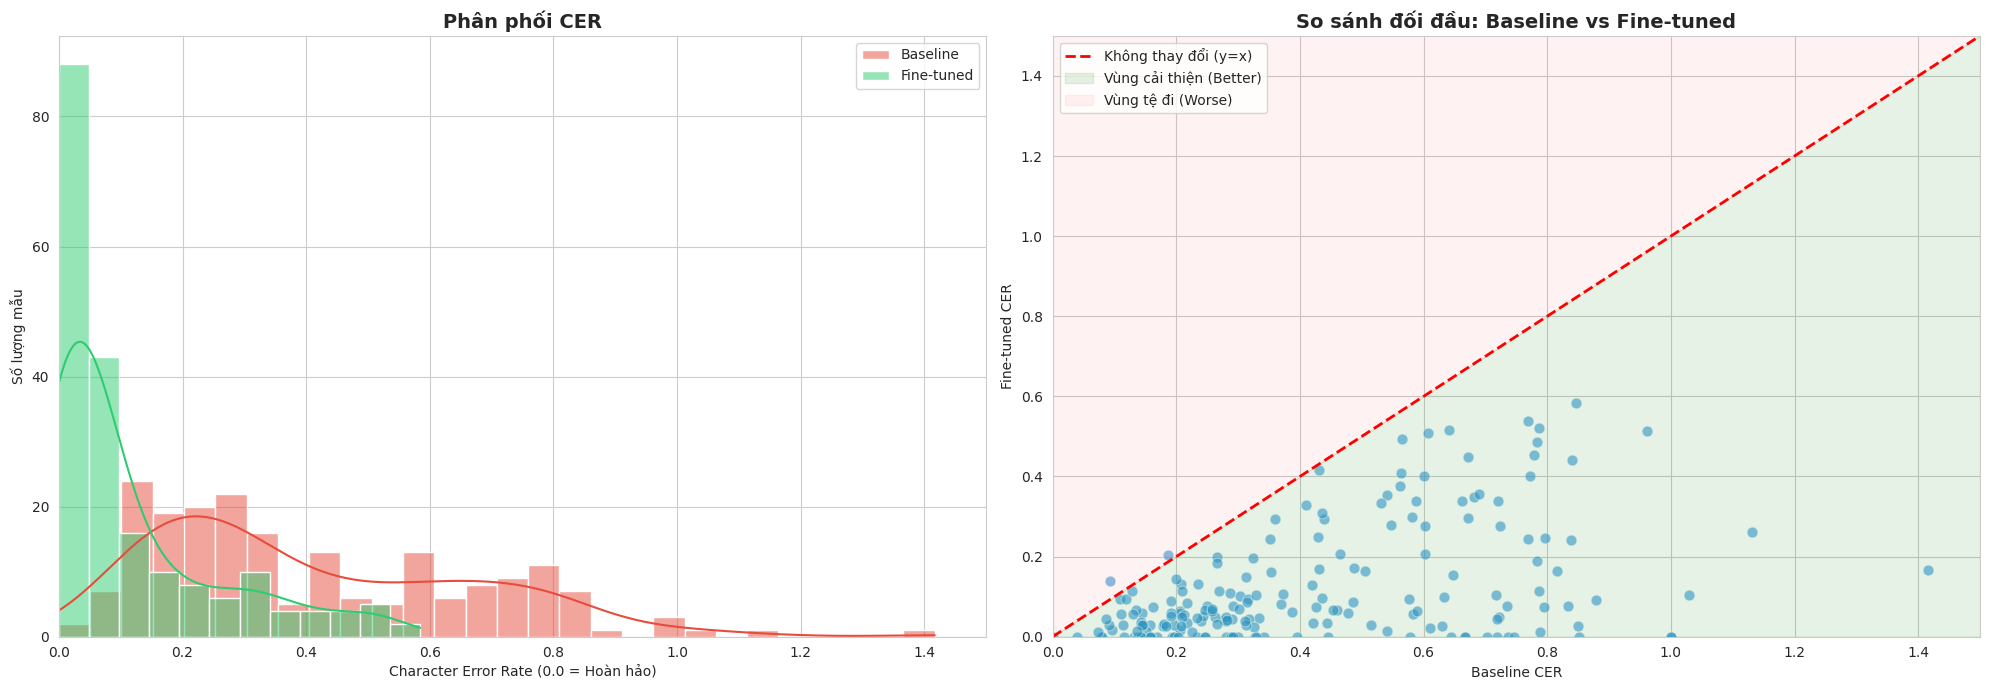

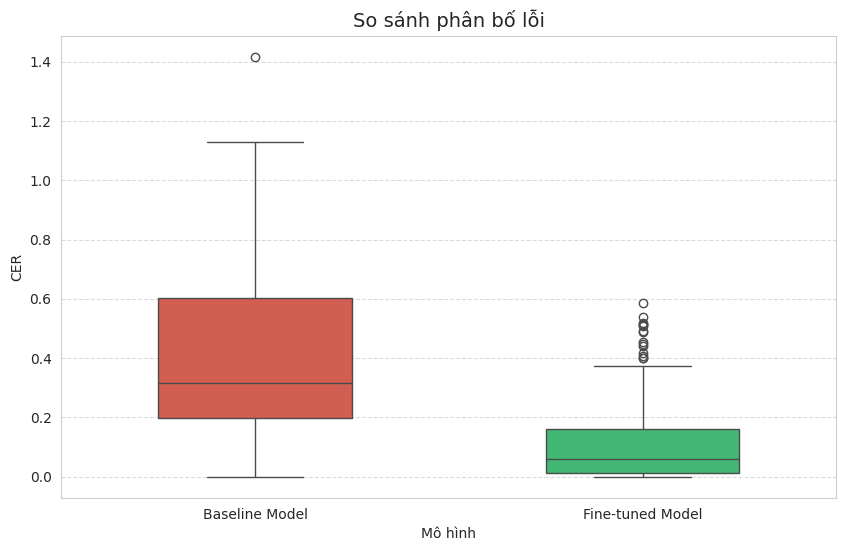

In [4]:
print(f"\nĐang vẽ biểu đồ trên {len(df_plot)} mẫu dữ liệu (đã lọc outlier)...")

# --- BƯỚC 2: VẼ BIỂU ĐỒ ---
fig, axes = plt.subplots(1, 2, figsize=(20, 7))

# Biểu đồ 1: Histogram (Phân phối lỗi)
# Sử dụng binwidth cố định để dễ so sánh
sns.histplot(data=df_plot, x='cer_baseline', color='#e74c3c', alpha=0.5, label='Baseline', kde=True, ax=axes[0], binwidth=0.05)
sns.histplot(data=df_plot, x='cer_finetune', color='#2ecc71', alpha=0.5, label='Fine-tuned', kde=True, ax=axes[0], binwidth=0.05)

axes[0].set_title(f'Phân phối CER', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Character Error Rate (0.0 = Hoàn hảo)')
axes[0].set_ylabel('Số lượng mẫu')
axes[0].set_xlim(0, outlier_threshold) # Giới hạn trục X
axes[0].legend()

# Biểu đồ 2: Scatter Plot (So sánh đối đầu)
sns.scatterplot(x='cer_baseline', y='cer_finetune', data=df_plot, alpha=0.6, color='#3498db', s=60, ax=axes[1])

# Vẽ đường chéo tham chiếu
# Điểm nằm DƯỚI đường này -> Fine-tune tốt hơn Baseline
# Điểm nằm TRÊN đường này -> Fine-tune tệ hơn
axes[1].plot([0, outlier_threshold], [0, outlier_threshold], 'r--', linewidth=2, label='Không thay đổi (y=x)')

# Tô màu vùng cải thiện (Tam giác dưới)
x_vals = np.linspace(0, outlier_threshold, 100)
axes[1].fill_between(x_vals, 0, x_vals, color='green', alpha=0.1, label='Vùng cải thiện (Better)')
axes[1].fill_between(x_vals, x_vals, outlier_threshold, color='red', alpha=0.05, label='Vùng tệ đi (Worse)')

axes[1].set_title('So sánh đối đầu: Baseline vs Fine-tuned', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Baseline CER')
axes[1].set_ylabel('Fine-tuned CER')
axes[1].set_xlim(0, outlier_threshold)
axes[1].set_ylim(0, outlier_threshold)
axes[1].legend()

plt.tight_layout()
plt.show()

# --- BƯỚC 3: BOXPLOT SO SÁNH (Thêm cái này để nhìn rõ trung vị) ---
plt.figure(figsize=(10, 6))
plot_data = pd.melt(df_plot[['cer_baseline', 'cer_finetune']].rename(columns={
    'cer_baseline': 'Baseline Model',
    'cer_finetune': 'Fine-tuned Model'
}))

sns.boxplot(data=plot_data, x='variable', y='value', palette=['#e74c3c', '#2ecc71'], width=0.5, hue='variable', legend=False)
plt.title('So sánh phân bố lỗi', fontsize=14)
plt.xlabel('Mô hình')
plt.ylabel('CER')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 4. Error Patterns

In [14]:
def highlight_diff(row):
    """Hàm tô màu cho dataframe hiển thị"""
    color = '#d1e7dd' if row['cer_improvement'] > 0 else '#f8d7da'
    return [f'background-color: {color}' for _ in row]

# 1. Top những mẫu cải thiện nhiều nhất (Success Cases) 
print(f"Só lượng mẫu Fine-tuned cải thiện hơn Baseline: {(df_merged['cer_improvement'] > 0).sum()} ({(df_merged['cer_improvement'] > 0).sum()/len(df_merged):.2%})")

top_improvements = df_merged.nlargest(5, 'cer_improvement')

print("\n=== TOP 5 TRƯỜNG HỢP CẢI THIỆN NHIỀU NHẤT (SUCCESS CASES) ===")
display(top_improvements[['ground_truth', 'pred_baseline', 'pred_finetune', 'cer_baseline', 'cer_finetune']])

Só lượng mẫu Fine-tuned cải thiện hơn Baseline: 198 (98.51%)

=== TOP 5 TRƯỜNG HỢP CẢI THIỆN NHIỀU NHẤT (SUCCESS CASES) ===


ground_truth  \
23   các nhà đầu tư trong Khu chế xuất Tân Thuận. Vậy thì khi không khắc phục ngay   
88                                                                    330.000 km2)   
67                                                                            đất.   
148                                                                            ngờ   
57            ta thực hiện hai cơ chế (vừa Nhà nước thực hiện thu hồi đất như cách   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

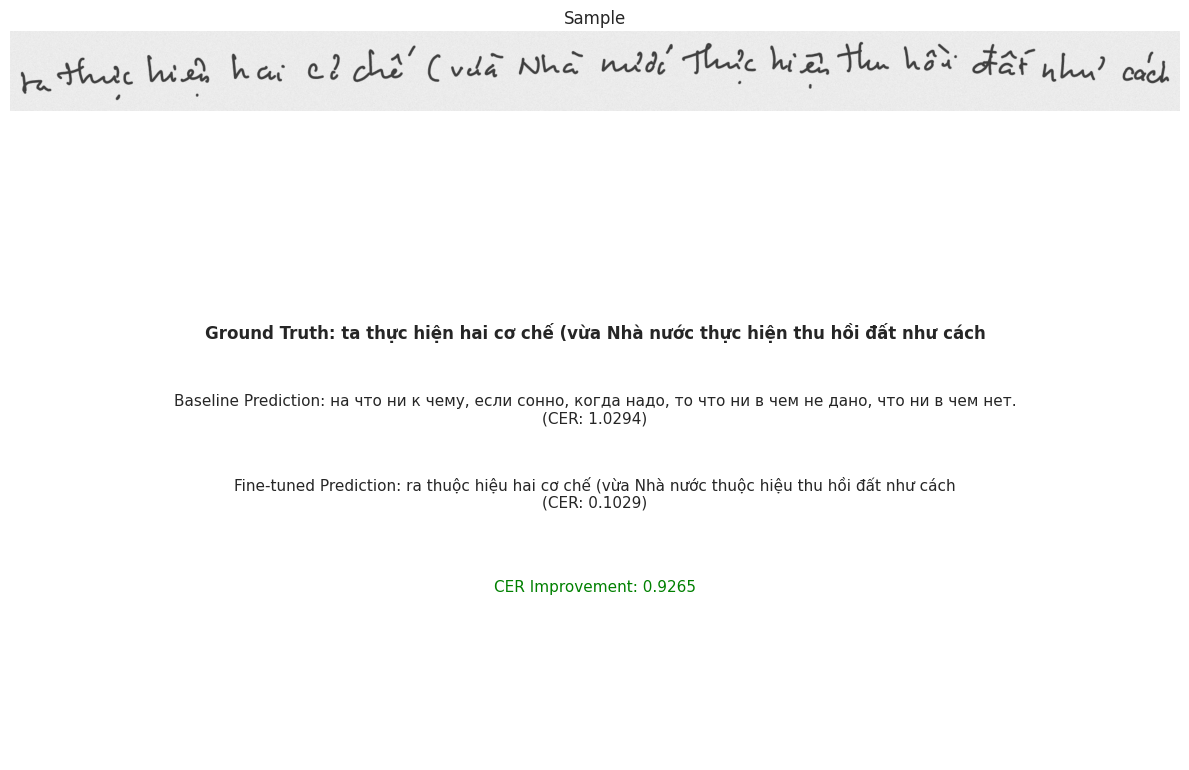

In [ ]:
# hiển thị 1 kết quả cải thiện bằng matplotlib
from PIL import Image

sample = top_improvements.iloc[4]

fig, ax = plt.subplots(2, 1, figsize=(12, 10))
img = Image.open(sample['image']).convert("RGB")
ax[0].imshow(img)
ax[0].axis('off')
ax[0].set_title('Sample')
ax[0].set_aspect('equal')
ax[1].axis('off')   
ax[1].text(0.5, 0.75, f"Ground Truth: {sample['ground_truth']}", fontsize=12, fontweight='bold', ha='center')
ax[1].text(0.5, 0.60, f"Baseline Prediction: {sample['pred_baseline']}\n(CER: {sample['cer_baseline']:.4f})", fontsize=11, ha='center')   
ax[1].text(0.5, 0.45, f"Fine-tuned Prediction: {sample['pred_finetune']}\n(CER: {sample['cer_finetune']:.4f})", fontsize=11, ha='center')
ax[1].text(0.5, 0.30, f"CER Improvement: {sample['cer_improvement']:.4f}", fontsize=11, color='green', ha='center')   
plt.subplots_adjust(hspace=-0.1)
plt.tight_layout()
plt.show()
# save fig
fig.savefig('top_improvement_example.png', bbox_inches='tight')

In [17]:
# 2. Những mẫu mô hình Fine-tuned làm tệ hơn (Failure Cases)
print(f"Só lượng mẫu Fine-tuned làm tệ hơn Baseline: {(df_merged['cer_improvement'] < 0).sum()} ({(df_merged['cer_improvement'] < 0).sum()/len(df_merged):.2%})")

# Đây là phần quan trọng cho mục "Discussion" -> "Limitations"
top_regressions = df_merged.nsmallest(5, 'cer_improvement')

print("\n=== TOP 5 TRƯỜNG HỢP SUY GIẢM CHẤT LƯỢNG (FAILURE CASES) ===")
display(top_regressions[['ground_truth', 'pred_baseline', 'pred_finetune', 'cer_baseline', 'cer_finetune']])

Só lượng mẫu Fine-tuned làm tệ hơn Baseline: 2 (1.00%)

=== TOP 5 TRƯỜNG HỢP SUY GIẢM CHẤT LƯỢNG (FAILURE CASES) ===


,ground_truth,pred_baseline,pred_finetune,cer_baseline,cer_finetune
183,"nhanh chóng khắc phục tình trạng quan liêu, cửa quyền, hách dịch.","nhans chóng thúc phục tình trạng quan liêu, của quyển, hạch dịch.","nhân chóng thác phục tình trạng quan liêu của quyền, khách dành.",0.092308,0.138462
193,Triển khai quyết định của TP về một số chính sách ưu đãi đối với,Trình khai quyết định của TP về mở sổ chính sách dự án đối với.,Triển khai quyết định của TP về môi đô chất sạch du lịch đối với,0.187500,0.203125
142,BẢN CHẤT CỦA THÀNH CÔNG,Bản chất của thành công,BẢN CHẤT CỦA THÀNH CÔNG,0.000000,0.000000
7,đã tố cáo tiêu cực ở đường liên cảng A5 10 triệu đồng. Đừng để người dân,"để tôi có thân cuộc ở đây, bạn cộng A5 10 năm đây. Đây, để người bạn","để tổ chức cuộc ở đường lưu cộng A5 10 tuần đông. Đảng, các nguồn vốn",0.430556,0.416667
125,"tham nhũng, lãng phí, làm thất thoát tài sản nhà nước... Về kinh","tham nhung, làng phí, làm thật thoát tài sản nhà nước... Viêm nh","tham nhũng, lặng phí, làm chất thốt tại sân nhà nước... Về kinh",0.109375,0.093750


In [8]:
# chuyển các kết quả trên thành csv và lưu
top_improvements.to_csv('../output/top_improvements.csv', index=False)
top_regressions.to_csv('../output/top_regressions.csv', index=False)
print("\nKết quả đã được lưu vào thư mục output dưới dạng CSV.")


Kết quả đã được lưu vào thư mục output dưới dạng CSV.
